In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score, roc_curve

In [2]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_test = MinMaxScaler(feature_range=(0, 1))
train_data = pd.read_csv('../Auto Pipeline/10_weekly_train.csv')
test_data = pd.read_csv('../Auto Pipeline/10_weekly_test.csv')
train_data.drop(["Date"],1, inplace = True)
test_data.drop(["Date"],1, inplace = True)

In [3]:
train_mov = train_data["movement"]
test_mov = test_data["movement"]
#col_name = train_data.drop(["movement"],1).columns
#train_data[col_name] = scaler.fit_transform(train_data.drop(["movement"],1))
#test_data[col_name] = scaler.fit_transform(test_data.drop(["movement"],1))
#train_data["movement"] = train_mov
#test_data["movement"] = test_mov

In [4]:
col_name = train_data.drop(["Close (t)","movement"],1).columns
train = train_data.copy()
test = test_data.copy()
train[col_name] = scaler_x.fit_transform(train_data.drop(["Close (t)","movement"],1))
label_train = pd.Series(scaler_y.fit_transform(train_data[["Close (t)"]]).reshape(-1))
test[col_name] = scaler_x.fit_transform(test_data.drop(["Close (t)","movement"],1))
scaled_test = pd.Series(scaler_test.fit_transform(test_data[["Close (t)"]]).reshape(-1))
label_test = test_data["Close (t)"]

In [5]:
def evaluate(test, label_test):
    predicted = test
    print("accuracy:", str(accuracy_score(label_test, predicted)))
    
    print("precision:", str(precision_score(label_test, predicted, average='weighted')))

    print("recall:", str(recall_score(label_test, predicted, average='weighted')))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    print("metrics.roc_auc_score", str(roc_auc_score(label_test, predicted, average='weighted')))

    cm = confusion_matrix(label_test, predicted)
    f = sns.heatmap(cm, annot=True, fmt='d')
    
    classification = classification_report(label_test, predicted)
    print(classification)

Decision Tree

In [7]:
dtr.fit(train, label_train)

score = dtr.score(train, label_train)
print("R-squared:", score) 

ypred = dtr.predict(test)
ypred = scaler_test.inverse_transform(ypred.reshape(-1,1))
ypred = ypred.reshape(-1)
mse = mean_squared_error(label_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 1.0
MSE:  124461.64968146698
RMSE:  62230.82484073349


In [8]:
#Obtain new train movement label based on whether ypred close price at t > close price at t-1
ypred_train = dtr.predict(train)
ypred_train = scaler_y.inverse_transform(ypred_train.reshape(-1,1))
ypred_train = ypred_train.reshape(-1)
train_move = (ypred_train - train_data["Close (t-1)"])
train_move = train_move.where(train_move < 0, 1).where(train_move >= 0, 0).astype(int)
label_train_move = train_data["movement"]
test_move = (ypred - test_data["Close (t-1)"])
test_move = test_move.where(test_move < 0, 1).where(test_move >= 0, 0).astype(int)
label_test_move = test_data["movement"]

accuracy: 0.614406779661017
precision: 0.7635101070725502
recall: 0.614406779661017
f1 0.47060448591184256
metrics.roc_auc_score 0.5036363636363637
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       275
           1       0.61      1.00      0.76       433

    accuracy                           0.61       708
   macro avg       0.81      0.50      0.39       708
weighted avg       0.76      0.61      0.47       708



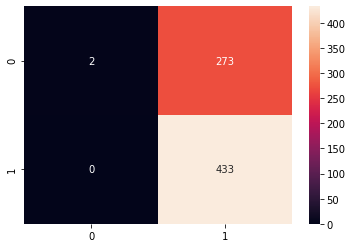

In [9]:
#metric_train = evaluate(train_move, label_train_move)
metric_test = evaluate(test_move, label_test_move)

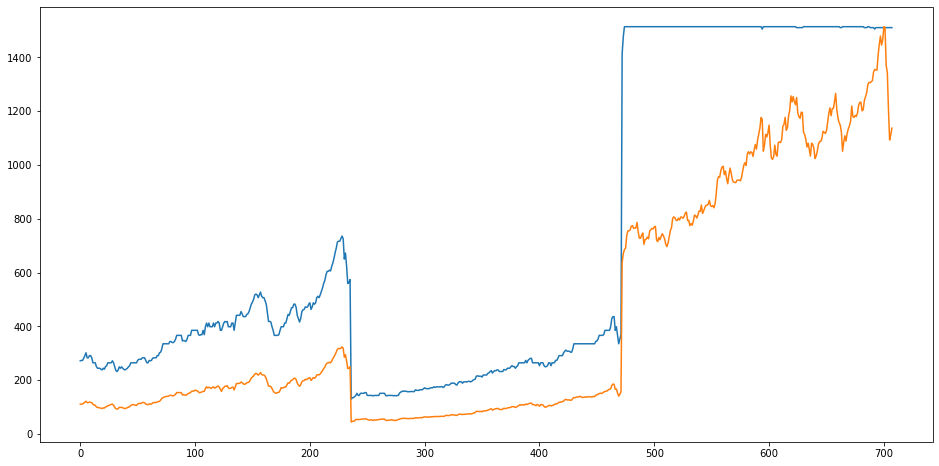

In [10]:
plt.figure(figsize=(16,8))
plt.plot(ypred)
plt.plot(label_test)

Gradient Boosting

In [11]:
gb = GradientBoostingRegressor()
GradientBoostingRegressor(ccp_alpha= 0, criterion='mse', max_depth=6) 

GradientBoostingRegressor(ccp_alpha=0, criterion='mse', max_depth=6)

In [12]:
gb.fit(train, label_train)

score = gb.score(train, label_train)
print("R-squared:", score) 

ypred = gb.predict(test)
ypred = scaler_test.inverse_transform(ypred.reshape(-1,1))
ypred = ypred.reshape(-1)
mse = mean_squared_error(label_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 0.9999786265134799
MSE:  105584.18062097066
RMSE:  52792.09031048533


In [13]:
#Obtain new train movement label based on whether ypred close price at t > close price at t-1
ypred_train = gb.predict(train)
ypred_train = scaler_y.inverse_transform(ypred_train.reshape(-1,1))
ypred_train = ypred_train.reshape(-1)
train_move = (ypred_train - train_data["Close (t-1)"])
train_move = train_move.where(train_move < 0, 1).where(train_move >= 0, 0).astype(int)
label_train_move = train_data["movement"]
test_move = (ypred - test_data["Close (t-1)"])
test_move = test_move.where(test_move < 0, 1).where(test_move >= 0, 0).astype(int)
label_test_move = test_data["movement"]

accuracy: 0.614406779661017
precision: 0.7635101070725502
recall: 0.614406779661017
f1 0.47060448591184256
metrics.roc_auc_score 0.5036363636363637
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       275
           1       0.61      1.00      0.76       433

    accuracy                           0.61       708
   macro avg       0.81      0.50      0.39       708
weighted avg       0.76      0.61      0.47       708



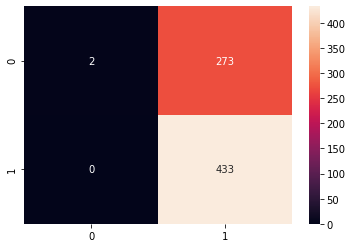

In [14]:
#metric_train = evaluate(train_move, label_train_move)
metric_test = evaluate(test_move, label_test_move)

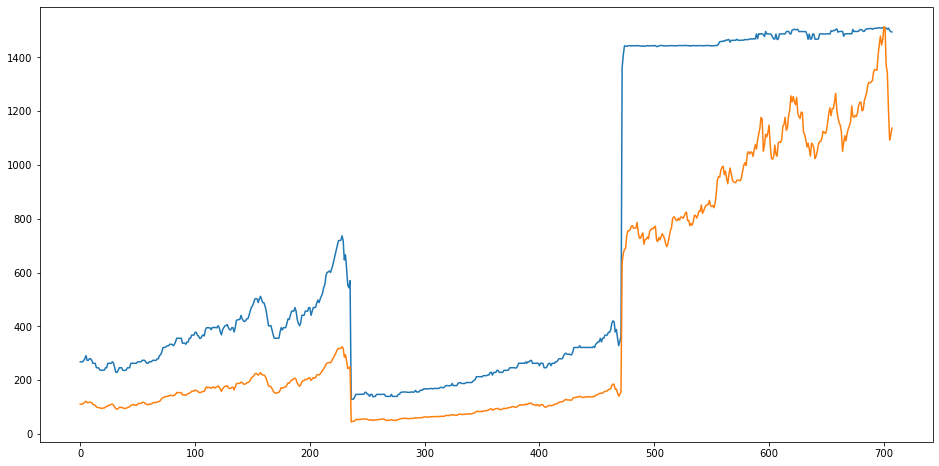

In [15]:
plt.figure(figsize=(16,8))
plt.plot(ypred)
plt.plot(label_test)

Random Forest

In [16]:
rfc = RandomForestRegressor()
RandomForestRegressor(ccp_alpha= 0, criterion='mse', max_depth=6) 

RandomForestRegressor(ccp_alpha=0, max_depth=6)

In [17]:
rfc.fit(train, label_train)

score = rfc.score(train, label_train)
print("R-squared:", score) 

ypred = rfc.predict(test)
ypred = gb.predict(test)
ypred = scaler_test.inverse_transform(ypred.reshape(-1,1))
ypred = ypred.reshape(-1)
mse = mean_squared_error(label_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 0.9999854431926956
MSE:  105584.18062097066
RMSE:  52792.09031048533


In [18]:
#Obtain new train movement label based on whether ypred close price at t > close price at t-1
ypred_train = rfc.predict(train)
ypred_train = scaler_y.inverse_transform(ypred_train.reshape(-1,1))
ypred_train = ypred_train.reshape(-1)
train_move = (ypred_train - train_data["Close (t-1)"])
train_move = train_move.where(train_move < 0, 1).where(train_move >= 0, 0).astype(int)
label_train_move = train_data["movement"]
test_move = (ypred - test_data["Close (t-1)"])
test_move = test_move.where(test_move < 0, 1).where(test_move >= 0, 0).astype(int)
label_test_move = test_data["movement"]

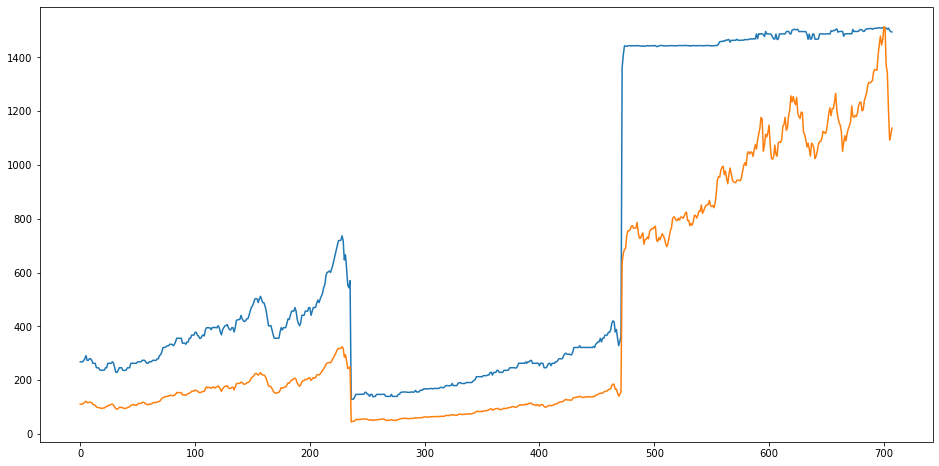

In [19]:
plt.figure(figsize=(16,8))
plt.plot(ypred)
plt.plot(label_test)

accuracy: 0.614406779661017
precision: 0.7635101070725502
recall: 0.614406779661017
f1 0.47060448591184256
metrics.roc_auc_score 0.5036363636363637
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       275
           1       0.61      1.00      0.76       433

    accuracy                           0.61       708
   macro avg       0.81      0.50      0.39       708
weighted avg       0.76      0.61      0.47       708



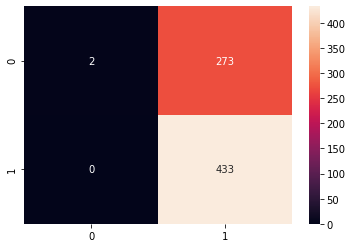

In [20]:
#metric_train = evaluate(train_move, label_train_move)
metric_test = evaluate(test_move, label_test_move)